In [1]:
import pandas as pd
import numpy as np
import ast
import pickle
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('listings.csv')

In [3]:
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].astype(float)

/Users/nikhilbhargava/opt/anaconda3/envs/probml/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


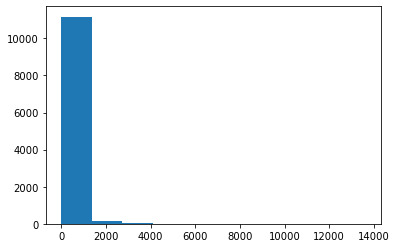

In [4]:
plt.hist(df['price'])
plt.show()

In [5]:
val = np.percentile(df.price,95)
df = df.loc[df.price<val]

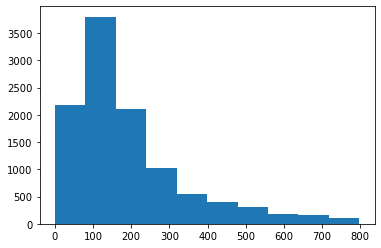

In [6]:
plt.hist(df['price'])
plt.show()

In [7]:
df.shape

(10803, 74)

In [8]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1078,https://www.airbnb.com/rooms/1078,20211211051409,2021-12-11,*UT/Hyde Park Craftsman Apartment,This upstairs apartment is surrounded by trees...,"Hyde Park is close to downtown, UT, 6th street...",https://a0.muscache.com/pictures/52472f12-2e2e...,4635658,https://www.airbnb.com/users/show/4635658,...,4.91,4.87,4.87,NaN,t,2,2,0,0,1.44
1,2265,https://www.airbnb.com/rooms/2265,20211211051409,2021-12-11,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,NaN,https://a0.muscache.com/pictures/4187/52d4f5d0...,2466,https://www.airbnb.com/users/show/2466,...,4.83,4.26,4.35,NaN,f,3,2,1,0,0.17
2,5245,https://www.airbnb.com/rooms/5245,20211211051409,2021-12-11,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,NaN,https://a0.muscache.com/pictures/5167505/b33b5...,2466,https://www.airbnb.com/users/show/2466,...,4.40,4.75,4.50,NaN,f,3,2,1,0,0.06
3,5456,https://www.airbnb.com/rooms/5456,20211211051409,2021-12-11,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,...,4.80,4.73,4.78,NaN,f,1,1,0,0,3.72
4,5769,https://www.airbnb.com/rooms/5769,20211211051409,2021-12-11,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,https://www.airbnb.com/users/show/8186,...,4.94,4.74,4.92,NaN,f,1,0,1,0,1.86


In [9]:
df = df[df['room_type']=='Entire home/apt']

In [10]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

## hasX

In [11]:
def handle_entry(s):
    # return amenities list
    s_list = ast.literal_eval(s)
    s_list = [s.lower() for s in s_list]
    return s_list

In [12]:
# clean amenity columns
df['amenities'] = df['amenities'].apply(lambda x: handle_entry(x))

In [13]:
# use amenity dict to create amenity columns
amenity_dict = {
'hasCooling': ['air conditioning'],
'hasHeating': ['heating'],
'hasParking': ['paid parking off premises']}

In [14]:
def ohe_amenities(amenity, x):
    if amenity in x:
        return 1
    else:
        return 0

In [15]:
# airbnb amenities
for agroup in amenity_dict.keys():
    amenity_cols = amenity_dict[agroup]
    for amenity in amenity_cols:
        df[amenity] = df['amenities'].apply(lambda x: ohe_amenities(amenity, x))
    df[agroup] = df[amenity_cols].sum(axis=1)
    df = df.drop(columns=amenity_cols)
    df[agroup] = np.where(df[agroup] >= 1, 1, 0)

## homeType

In [16]:
valid_homes = ['Entire guesthouse',
 'Entire residential home',
 'Entire guest suite',
 'Entire townhouse',
 'Entire condominium (condo)',
 'Entire rental unit',
 'Entire bungalow',
 'Entire loft',
 'Entire cottage',
 'Entire cabin',
 'Entire villa',
 'Tiny house',
 'Entire place',
 'Entire serviced apartment',
 'Entire vacation home',
 'Entire chalet',
 'Entire home/apt']
df = df[df['property_type'].isin(valid_homes)]

In [17]:
home_dict = {
'homeType_house': ['Entire guesthouse',
 'Entire residential home',
 'Entire townhouse',
 'Entire rental unit',
 'Entire bungalow',
 'Entire cottage',
 'Entire cabin',
 'Entire place',
 'Entire serviced apartment',
 'Entire vacation home',
 'Entire chalet',
 'Entire home/apt'],
'homeType_condo': ['Entire condominium (condo)'],
'homeType_other': ['Tiny house', 'Entire villa', 'Entire loft', 'Entire guest suite']}

In [18]:
# airbnb amenities
for agroup in home_dict.keys():
    amenity_cols = home_dict[agroup]
    for amenity in amenity_cols:
        df[amenity] = df['property_type'].apply(lambda x: ohe_amenities(amenity, x))
    df[agroup] = df[amenity_cols].sum(axis=1)
    df = df.drop(columns=amenity_cols)
    df[agroup] = np.where(df[agroup] >= 1, 1, 0)

## housingPrice (model stacking)

In [19]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [20]:
bathroom_text_dict = {'Shared half-bath': '0.5', 'Half-bath': '0.5', 'Private half-bath': '0.5', np.nan: '1'}
df['bathrooms_text'] = df['bathrooms_text'].apply(lambda x: bathroom_text_dict[x] if x in list(bathroom_text_dict.keys()) else x)
df['bathrooms'] = df['bathrooms_text'].apply(lambda x: float(x.split()[0]))

In [21]:
df['numOfBathrooms'] = df['bathrooms'].fillna(df['bedrooms'].median())
df['numOfBedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
predict_prices = df[['hasParking', 'hasCooling', 'hasHeating', 'homeType_condo', 'homeType_house',
                     'homeType_other', 'numOfBathrooms', 'numOfBedrooms']]

In [22]:
predict_prices.columns

Index(['hasParking', 'hasCooling', 'hasHeating', 'homeType_condo',
       'homeType_house', 'homeType_other', 'numOfBathrooms', 'numOfBedrooms'],
      dtype='object')

In [23]:
predict_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8524 entries, 0 to 11373
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hasParking      8524 non-null   int64  
 1   hasCooling      8524 non-null   int64  
 2   hasHeating      8524 non-null   int64  
 3   homeType_condo  8524 non-null   int64  
 4   homeType_house  8524 non-null   int64  
 5   homeType_other  8524 non-null   int64  
 6   numOfBathrooms  8524 non-null   float64
 7   numOfBedrooms   8524 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 599.3 KB


In [24]:
price_model = pickle.load(open('pricemodel.pkl', 'rb'))

/Users/nikhilbhargava/opt/anaconda3/envs/probml/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LinearRegression from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [25]:
house_prices = price_model.predict(predict_prices)

/Users/nikhilbhargava/opt/anaconda3/envs/probml/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [26]:
df['house_price'] = house_prices

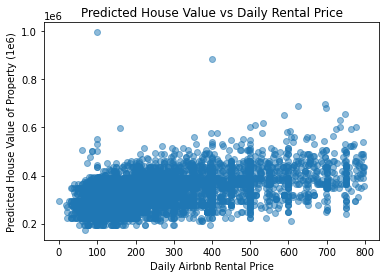

In [40]:
plt.scatter(df['price'], df['house_price'], alpha=0.5)
plt.title('Predicted House Value vs Daily Rental Price')
plt.ylabel('Predicted House Value of Property (1e6)')
plt.xlabel('Daily Airbnb Rental Price')
plt.show()

## ROI

In [28]:
df['investment_cost'] = df['house_price']*0.2 + df['house_price']*0.8*1.065

In [29]:
df['price_minus_fee'] = df['price']*0.97

In [30]:
occupancy_rate = 0.216

In [31]:
# df['days_breakeven'] = df['house_price']/(df['price_minus_fee']*occupancy_rate)
# df['years_breakeven'] = df['days_breakeven']/365

df['days_breakeven'] = df['investment_cost']/(df['price_minus_fee']*occupancy_rate)
df['years_breakeven'] = df['days_breakeven']/365
df['expected_daily_roi'] = df['price']/df['days_breakeven']

In [32]:
results = df[['name','description', 'price', 'hasParking', 'hasCooling', 'hasHeating', 
    'homeType_condo', 'homeType_house', 'homeType_other', 'numOfBathrooms', 
    'numOfBedrooms', 'years_breakeven', 'house_price', 'host_neighbourhood']].sort_values(by='years_breakeven')

In [62]:
neighborhood = results.groupby(['host_neighbourhood'])['years_breakeven'].mean().sort_values().reset_index(name='years_breakeven').head(5)

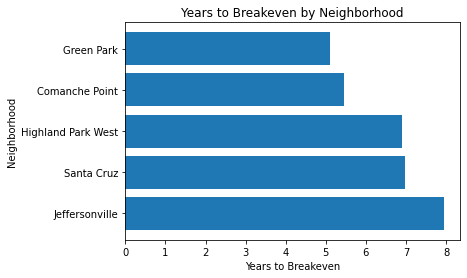

In [78]:
neighborhood = neighborhood.sort_values(by='years_breakeven', ascending=False)
plt.barh(neighborhood.host_neighbourhood, neighborhood.years_breakeven)
plt.title('Top 5 Neighborhoods for ROI')
plt.ylabel('Neighborhood')
plt.xlabel('Years to Breakeven')
plt.show()

In [51]:
results['Bed_bath'] = 'Bdr:' + results['numOfBedrooms'].astype('str') + ', Bath:' + results['numOfBathrooms'].astype('str')

In [63]:
bed_bath = results.groupby(['Bed_bath'])['years_breakeven'].mean().sort_values().reset_index(name='years_breakeven').head(5)

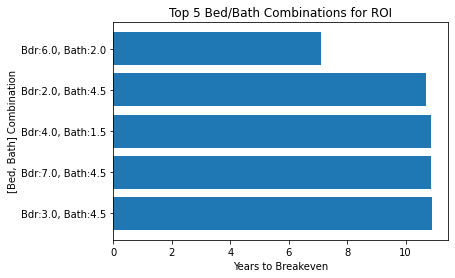

In [80]:
bed_bath = bed_bath.sort_values(by='years_breakeven', ascending=False)
plt.barh(bed_bath.Bed_bath, bed_bath.years_breakeven)
plt.title('Top 5 Bed/Bath Combinations for ROI')
plt.ylabel('[Bed, Bath] Combination')
plt.xlabel('Years to Breakeven')
plt.show()